# Polynomial approximations of functions

Automate the production of polynomial approximations to functions for microcontroller work.

Author. Tim Molteno (c) 2023

We form an expression for the integral of the square of the error. Then symbolically come up with a better polynomial approximation by using sympy differentiation to minimize this integral.

In [48]:
import sympy as sp
import numpy as np

In [64]:
order = 3;
x = sp.Symbol('x', real=True)
symbols = []
poly = 0

for o in range(0, order+1):
    symbols.append((o, sp.Symbol(f"x_{o}", real=True)))

for s in symbols:
    o, p = s
    print(o,p)
    poly = poly + p*x**o

original = sp.cos(x)

0 x_0
1 x_1
2 x_2
3 x_3


In [77]:
lower = -sp.pi/2
upper = sp.pi/2
eps2 = sp.Integral( (poly - original)**2, (x,lower,upper) )

In [78]:
eps2

Integral((x**3*x_3 + x**2*x_2 + x*x_1 + x_0 - cos(x))**2, (x, -pi/2, pi/2))

In [79]:
fn = sp.simplify(sp.expand(eps2, x))
fn

pi*x_0**2 + pi**3*x_0*x_2/6 - 4*x_0 + pi**3*x_1**2/12 + pi**5*x_1*x_3/40 + pi**5*x_2**2/80 - 2*x_2*(-4 + pi**2/2) + pi**7*x_3**2/448 + pi/2

In [80]:
eqns = [sp.Eq(sp.diff(fn, _x),0) for o, _x in symbols]
eqns

[Eq(2*pi*x_0 + pi**3*x_2/6 - 4, 0),
 Eq(pi**3*x_1/6 + pi**5*x_3/40, 0),
 Eq(pi**3*x_0/6 + pi**5*x_2/40 - pi**2 + 8, 0),
 Eq(pi**5*x_1/40 + pi**7*x_3/224, 0)]

In [81]:
soln = sp.solve(eqns)
soln

{x_0: (60 - 3*pi**2)/pi**3, x_1: 0, x_2: (-720 + 60*pi**2)/pi**5, x_3: 0}

## Create an approximating functin

In [82]:
approx = sp.simplify(poly.subs(soln))
approx

3*(20*x**2*(-12 + pi**2) + pi**2*(20 - pi**2))/pi**5

In [83]:
func = sp.lambdify([x], approx, 'numpy')
approx.evalf()

0.980162407440597 - 0.417697757006468*x**2

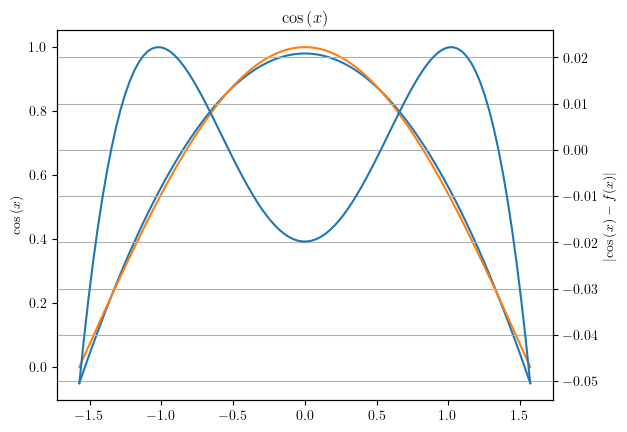

In [84]:
import matplotlib.pyplot as plt

original_np = sp.lambdify([x], original, 'numpy')

theta = np.linspace(-np.pi/2,np.pi/2, 100)
plt.rcParams.update({
    "text.usetex": True})

fig, ax1 = plt.subplots()
ax1.plot(theta, func(theta))
ax1.plot(theta, original_np(theta))
ax1.set_ylabel(f"${sp.latex(original)}$")

ax2 = ax1.twinx()
ax2.set_ylabel(f"$\\left|{sp.latex(original)} - f(x) \\right|$")
ax2.plot(theta, func(theta) - original_np(theta))
plt.title(f"${sp.latex(original)}$")
plt.grid(True)

In [11]:
sp.printing.lambdarepr.lambdarepr(approx.evalf())

'-0.00127871387501317*x**6 + 0.0415117364928635*x**4 - 0.499930919787912*x**2 + 0.999995282689844'

## Automating this



In [41]:
def poly_approx(_original, _order, lower, upper):
    x = sp.Symbol('x', real=True)
    symbols = []
    poly = 0

    for o in range(_order+1):
        symbols.append(sp.Symbol(f"x_{o}", real=True))

    for i, s in enumerate(symbols):
        poly = poly + s*x**i

    eps2 = sp.Integral( (poly - _original)**2, (x,lower, upper) )
    fn = sp.simplify(sp.expand(eps2, x))
    eqns = [sp.Eq(sp.diff(fn, _x),0) for _x in symbols]
    soln = sp.solve(eqns)
    approx = sp.simplify(poly.subs(soln))
    func = sp.lambdify([x], approx, 'numpy')
    print(approx.evalf())

    original_np = sp.lambdify([x], _original, 'numpy')

    theta = np.linspace(-np.pi/2,np.pi/2, 200)
    plt.rcParams.update({
        "text.usetex": True})

    fig, ax1 = plt.subplots()
    ax1.plot(theta, func(theta), color='r')
    ax1.plot(theta, original_np(theta), color='g')
    ax1.set_ylabel(f"${sp.latex(_original)}$")

    ax2 = ax1.twinx()
    ax2.set_ylabel(f"$\\left|{sp.latex(_original)} - f(x) \\right|$")
    ax2.plot(theta, func(theta) - original_np(theta), color='b')
    plt.title(f"Order {_order} approximation to ${sp.latex(_original)}$ over $[{sp.latex(lower)},{sp.latex(upper)}]$")
    plt.grid(True)
    
    return approx

In [ ]:
poly_approx(sp.exp(-x**2), 22, -10, 10)